In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

# Read the csv files
death_file = os.path.join("Resources","Deaths_By_P&E.csv")
insurance_file = os.path.join("Resources","Insured_By_State.csv")

# Create Dataframes
deathFile_df = pd.read_csv(death_file)
insuranceFile_df = pd.read_csv(insurance_file, skiprows=[0,1])
insuranceFile_df
# Insurance file header
insuranceFile_df.head()

,Location,Employer,Non-Group,Medicaid,Medicare,Other Public,Uninsured,Total
0,United States,0.49,0.07,0.19,0.14,0.02,0.09,1.0
1,Alabama,0.47,0.05,0.21,0.16,0.03,0.09,1.0
2,Alaska,0.46,0.03,0.20,0.10,0.08,0.14,1.0
3,Arizona,0.44,0.05,0.21,0.15,0.03,0.12,1.0
4,Arkansas,0.44,0.09,0.21,0.17,0.02,0.08,1.0


In [27]:
# Death file header
deathFile_df.head()

,geoid,Region,State,age,season,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,pecent complete
0,National,NaN,NaN,All,2009-10,200940,149.0,3484.0,3633.0,46412.0,7.827717,97.546212
1,National,NaN,NaN,All,2009-10,200941,174.0,3703.0,3877.0,46453.0,8.346070,97.632384
2,National,NaN,NaN,All,2009-10,200942,239.0,3841.0,4080.0,47451.0,8.598344,99.729926
3,National,NaN,NaN,All,2009-10,200943,295.0,3762.0,4057.0,46432.0,8.737509,97.588247
4,National,NaN,NaN,All,2009-10,200944,298.0,3858.0,4156.0,47372.0,8.773115,99.563888


In [28]:
# Cleaning up the death data file

# Breaking up the "MMWR Year/Week" column and converting into just a "Year" Column
deathFile_df['Year'] = deathFile_df['MMWR Year/Week'].astype(str).str[0:4]

# Drops the season and MMWR Year/Week column
Drop_season_and_yearWeek_df= deathFile_df.drop(['season', 'MMWR Year/Week', 'pecent complete'], axis=1)
# Death file header
#Drop_season_and_yearWeek_df.head()

# Fixing spelling errors in column names
spell_check_df = Drop_season_and_yearWeek_df.rename(index=str, 
                                                    columns={"geoid": "Geo ID", 
                                                             "age": "Age", 
                                                             "Deaths from pneumonia and influenza": 
                                                             "Deaths from Pneumonia and Influenza", 
                                                             "Pecent of deaths due to pneumonia or influenza": 
                                                             "Percent of deaths due to Pneumonia or Influenza"})
# Spell check header
spell_check_df.head()

,Geo ID,Region,State,Age,Deaths from influenza,Deaths from pneumonia,Deaths from Pneumonia and Influenza,All Deaths,Percent of deaths due to Pneumonia or Influenza,Year
0,National,NaN,NaN,All,149.0,3484.0,3633.0,46412.0,7.827717,2009
1,National,NaN,NaN,All,174.0,3703.0,3877.0,46453.0,8.346070,2009
2,National,NaN,NaN,All,239.0,3841.0,4080.0,47451.0,8.598344,2009
3,National,NaN,NaN,All,295.0,3762.0,4057.0,46432.0,8.737509,2009
4,National,NaN,NaN,All,298.0,3858.0,4156.0,47372.0,8.773115,2009


In [29]:
# Creating a data frame for just the states
# Drop region column in the data frame
drop_region_df = pd.DataFrame(spell_check_df.drop(['Region', 'Deaths from influenza', 'Deaths from pneumonia'], axis=1))
drop_region_df.head()

,Geo ID,State,Age,Deaths from Pneumonia and Influenza,All Deaths,Percent of deaths due to Pneumonia or Influenza,Year
0,National,NaN,All,3633.0,46412.0,7.827717,2009
1,National,NaN,All,3877.0,46453.0,8.346070,2009
2,National,NaN,All,4080.0,47451.0,8.598344,2009
3,National,NaN,All,4057.0,46432.0,8.737509,2009
4,National,NaN,All,4156.0,47372.0,8.773115,2009


In [71]:
#Deaths from Pneumonia and Influenza in the year of 2016 of every state.
states_2016_pneu_influ = pd.DataFrame(spell_check_df.loc[spell_check_df["Year"] == "2016"].groupby("State")["Deaths from Pneumonia and Influenza"].sum())
states_2016_pneu_influ = states_2016_pneu_influ.sort_values(by="Deaths from Pneumonia and Influenza",ascending=False)
states_2016_pneu_influ = states_2016_pneu_influ.astype(int)

In [72]:
#Deaths from all other causes other than Pnuemonia and influenza in the year of 2016 of every state.
states_2016_allDeaths = pd.DataFrame(spell_check_df.loc[spell_check_df["Year"] == "2016"].groupby("State")["All Deaths"].sum())
states_2016_allDeaths = states_2016_allDeaths.astype(int)
states_2016_allDeaths

,All Deaths
State,
Alabama,52160
Alaska,4458
Arizona,56328
Arkansas,31581
California,260586
Colorado,37308
Connecticut,30373
Delaware,8836
District of Columbia,5018


In [73]:
# Edit the data so that it appears as percentages
# Drop the total column
Drop_total_df = pd.DataFrame(insuranceFile_df.drop(['Total'], axis=1))

Drop_total_df

Drop_total_df = Drop_total_df.drop(Drop_total_df.index[52:78])
# Replace Null with 0
drop_null_df = Drop_total_df.fillna(0)

drop_null_df.style.format({
   'Employer': '{:,.0%}'.format,
   'Non-Group': '{:,.0%}'.format,
   'Medicaid': '{:,.0%}'.format,
    'Medicare':'{:,.0%}'.format,
    'Other Public': '{:,.0%}'.format,
    'Uninsured':'{:,.0%}'.format
})

,Location,Employer,Non-Group,Medicaid,Medicare,Other Public,Uninsured
0,United States,49%,7%,19%,14%,2%,9%
1,Alabama,47%,5%,21%,16%,3%,9%
2,Alaska,46%,3%,20%,10%,8%,14%
3,Arizona,44%,5%,21%,15%,3%,12%
4,Arkansas,44%,9%,21%,17%,2%,8%
5,California,46%,8%,25%,11%,1%,8%
6,Colorado,52%,7%,16%,13%,3%,10%
7,Connecticut,54%,6%,20%,14%,0%,6%
8,Delaware,47%,4%,22%,16%,2%,9%
9,District of Columbia,51%,7%,24%,11%,0%,5%


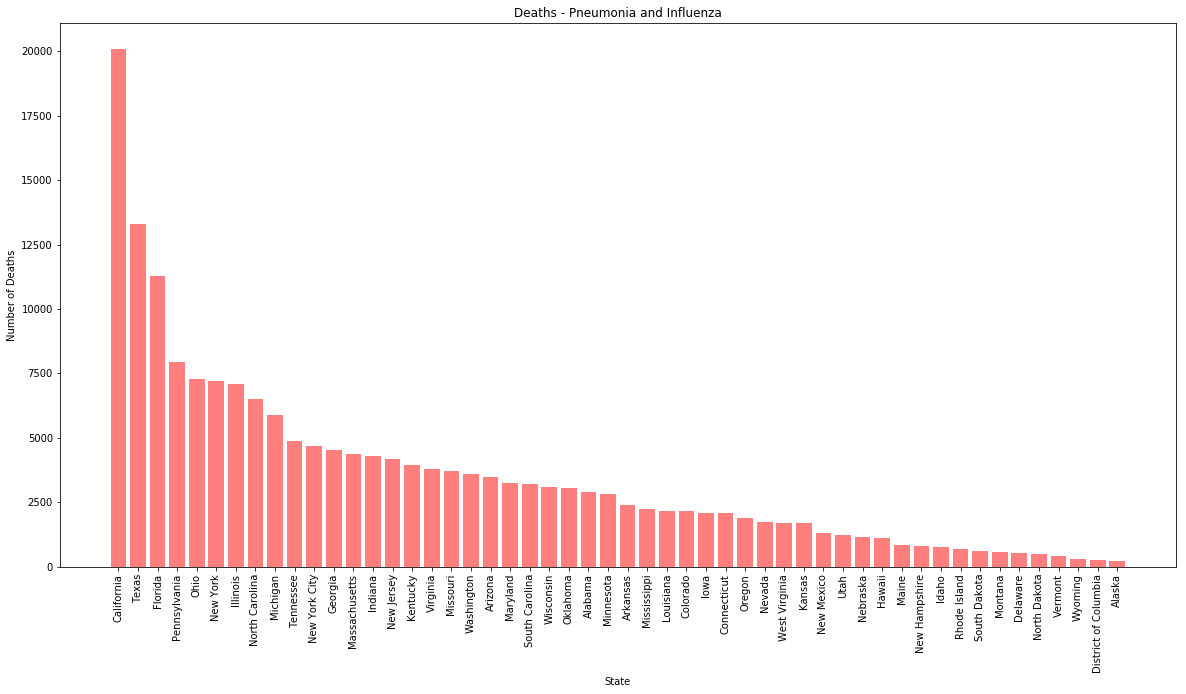

In [74]:
x_axis = np.arange(len(states_2016_pneu_influ))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, states_2016_pneu_influ["Deaths from Pneumonia and Influenza"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, states_2016_pneu_influ.index, rotation="vertical")
plt.title("Deaths - Pneumonia and Influenza")
plt.xlabel("State")
plt.ylabel("Number of Deaths")
plt.savefig("Deaths - Pneumonia and Influenza.png")
plt.show()